<a href="https://colab.research.google.com/github/SOOOO00/AI-Research-Notes/blob/main/01_ML_Basics/02_Model_Interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

数据维度： (20640, 8)
Train R2: 0.9742046305853331
Test  R2: 0.8061857564039718


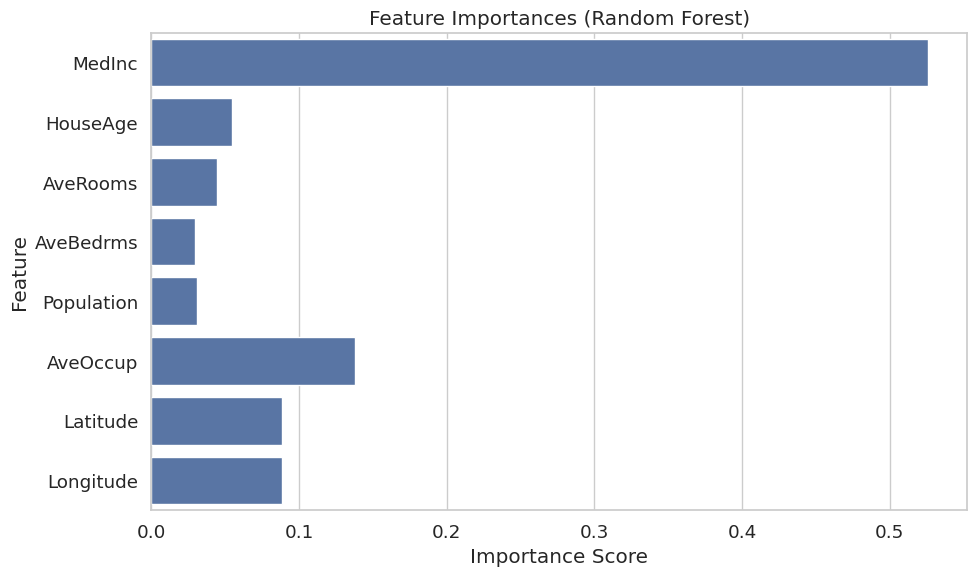

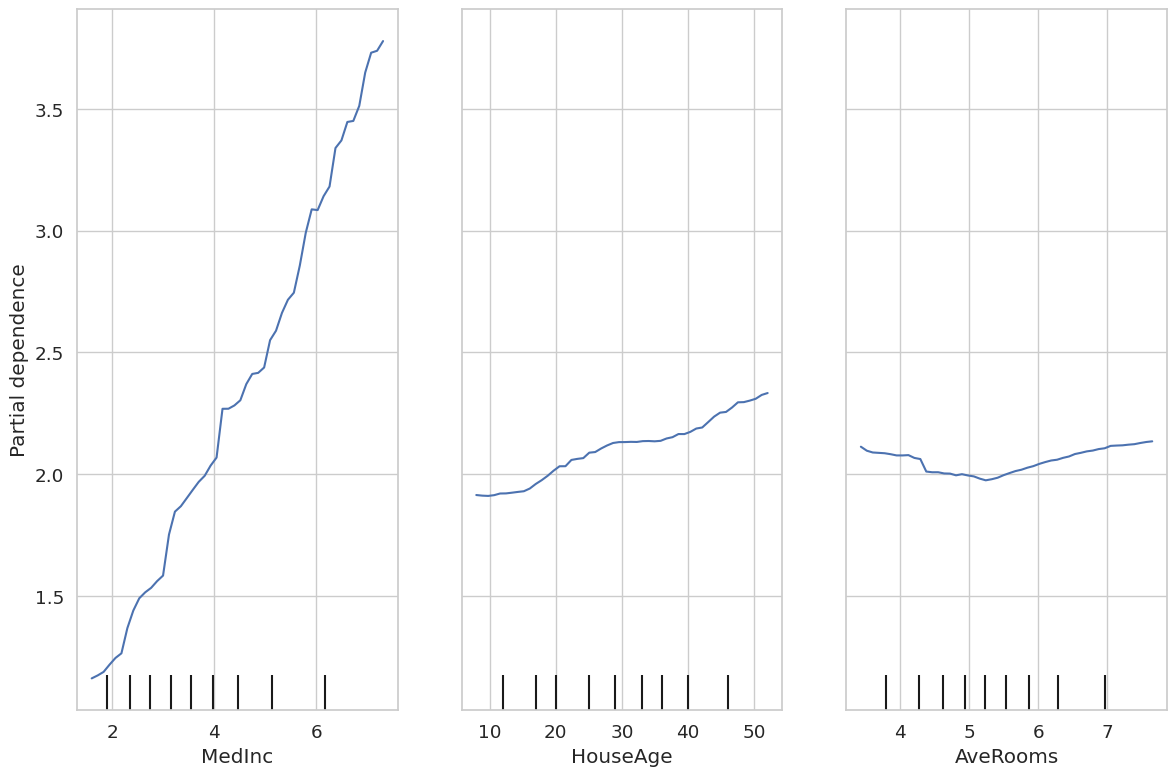

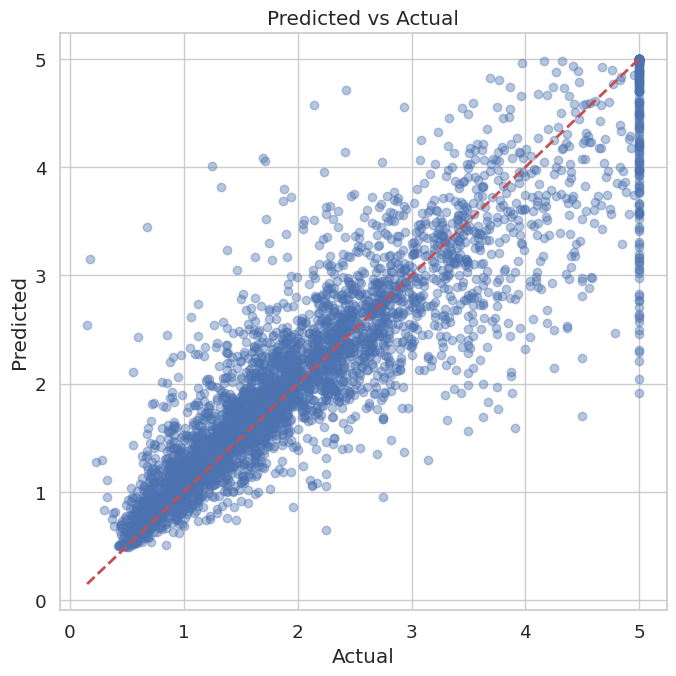

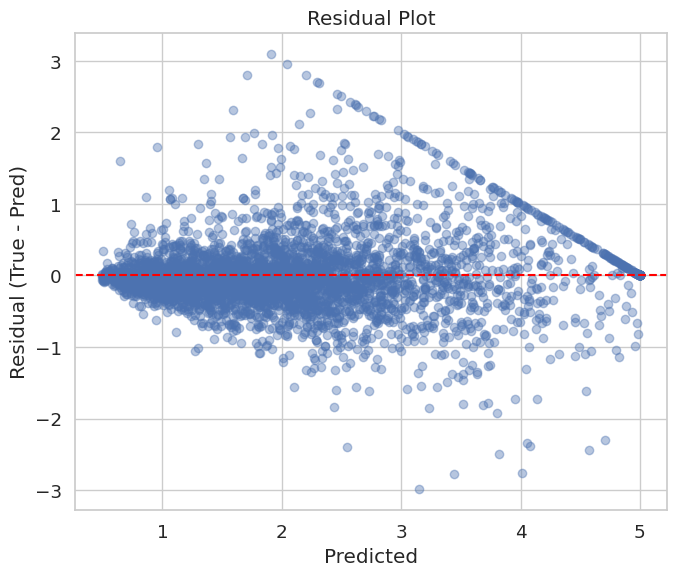

In [ ]:
# ============================
# 02_Model_Interpretation.ipynb
# ============================

# ---- 环境与依赖 ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

import shap

sns.set(style="whitegrid", font_scale=1.2)

# ---- 1. 加载数据 ----
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

feature_names = housing.feature_names

print("数据维度：", X.shape)
X.head()

# ---- 2. 划分数据集 ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- 3. 训练模型 ----
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
)
model.fit(X_train, y_train)

print("Train R2:", model.score(X_train, y_train))
print("Test  R2:", model.score(X_test, y_test))

# ============================
# ★ 图 1：特征重要性
# ============================
importances = model.feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=150)
plt.show()

# ============================
# ★ 图 2：PDP —— 单特征依赖
# ============================
features_to_plot = ["MedInc", "HouseAge", "AveRooms"]

fig, ax = plt.subplots(figsize=(12, 8))

PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=features_to_plot,
    grid_resolution=50,
    ax=ax
)

plt.tight_layout()
plt.savefig("pdp_selected_features.png", dpi=150)
plt.show()

# ============================
# ★ 图 3：预测 vs 实际
# ============================
y_pred = model.predict(X_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.tight_layout()
plt.savefig("pred_vs_actual.png", dpi=150)
plt.show()

# ============================
# ★ 图 4：残差图
# ============================
residuals = y_test - y_pred

plt.figure(figsize=(7,6))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residual (True - Pred)")
plt.title("Residual Plot")
plt.tight_layout()
plt.savefig("residuals.png", dpi=150)
plt.show()